In [16]:
import subprocess
def run_command(args):
    return float(subprocess.run([*args], capture_output=True).stdout.decode("utf-8"))



In [17]:
# run function call test 1000 times (1 data point)
from statistics import fmean, pstdev, pvariance

def run_function_call():
    times = [run_command(["./a.out"]) for _ in range(100)]
    # print(f"mean = {fmean(times)}")
    # print(f"stddev = {pstdev(times)}")
    # print(f"variance = {pvariance(times)}")
    return fmean(times)

run_function_call()

1.4999999999999998e-06

In [18]:
# function call trial

def function_call_bench():
    # warm the benchmark
    for _ in range(10):
        run_function_call()

    # actual runs
    runs = [run_function_call() for _ in range(1000)]
    return runs



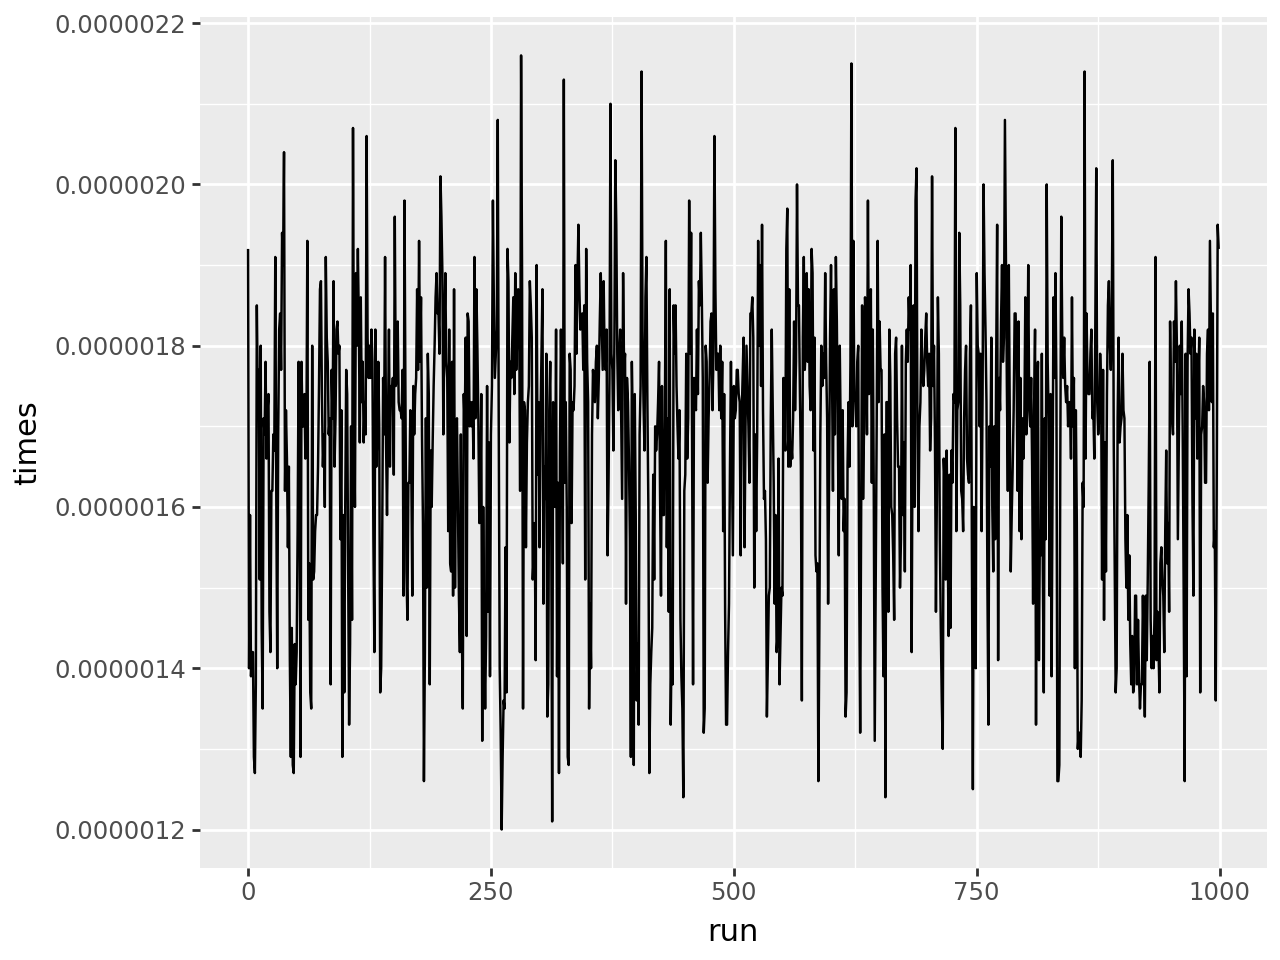

In [19]:
import pandas as pl
from plotnine import ggplot, aes, geom_line

df = pl.DataFrame({
    "times": function_call_bench(),
    "run": [i for i in range(1000)]
})

ggplot(df) + aes(x="run", y="times") + geom_line(stat="identity")

In [20]:
pvariance(df["times"])

3.1134870399999996e-14